In [1]:
from sympy import *
init_printing()
from sympy.physics.mechanics import *

In [2]:
# 惯性坐标系
N = ReferenceFrame('N')

In [3]:
# 内圈位移
delta_x, delta_y, delta_z, gamma_x, gamma_y = symbols('delta_x, delta_y, delta_z, gamma_x, gamma_y ')
delta_x, delta_y, delta_z, gamma_x, gamma_y 
# 滚子位移
u_x, u_z, phi_y = symbols('u_x, u_z, phi_y ')
u_x, u_z, phi_y 

In [4]:
# 内圈角位移后的坐标系
I = N.orientnew('I', 'Body', [gamma_x, gamma_y, 0], '123')
I1 = N.orientnew('I1', 'Body', [gamma_y, gamma_x, 0], '213')

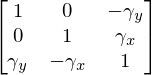

In [5]:
I1.dcm(N).subs({cos(gamma_y):1,cos(gamma_x):1,sin(gamma_x):gamma_x,sin(gamma_y):gamma_y}).subs({gamma_x*gamma_y:0})

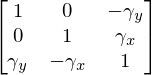

In [6]:
# 内圈角位移比较小，可以简化为如下
I.dcm(N).subs({cos(gamma_y):1,cos(gamma_x):1,sin(gamma_x):gamma_x,sin(gamma_y):gamma_y}).subs({gamma_x*gamma_y:0})

In [7]:
# 内圈受力后原点的位移
Inner_O = delta_x * N.x + delta_y * N.y + delta_z * N.z
Inner_O

In [8]:
Dw,lw,Rs,rm,alpha,beta,gamma,theta,epsilon,rho_k,Z,rz,e,psi = symbols('D_w,l_w,R_s,r_m,alpha,beta,gamma,theta,epsilon,rho_k,Z,rz,e,psi')
Dw,lw,Rs,rm,alpha,beta,gamma,theta,epsilon,rho_k,Z,rz,e,psi

In [9]:
#gamma = (alpha + beta)/2
#epsilon = (alpha - beta)/2
#rm = Dw * sin(gamma)/(2 * tan(epsilon))
#rho_k = (rm/sin(gamma) - Z) * tan(epsilon)
#rho_k.simplify()

In [10]:
# 外圈滚道 在惯性坐标系下的矢量
r_e = (rm - rz * sin(gamma) + rho_k * cos(gamma)) * cos(psi) * N.x + \
      (rm - rz * sin(gamma) + rho_k * cos(gamma)) * sin(psi) * N.y + \
      (e + rz * cos(gamma) + rho_k * sin(gamma)) * N.z
r_e        

In [11]:
# 内圈滚道 在惯性坐标系下的矢量
r_i0 = (rm - rz * sin(gamma) - rho_k * cos(gamma)) * cos(psi) * N.x + \
      (rm - rz * sin(gamma) - rho_k * cos(gamma)) * sin(psi) * N.y + \
      (e + rz * cos(gamma) - rho_k * sin(gamma)) * N.z
r_i0  

In [12]:
(r_i0 -r_e ).simplify()

In [13]:
# 内圈滚道 变形后在惯性坐标系下的矢量
r_i = (rm - rz * sin(gamma) - rho_k * cos(gamma)) * cos(psi) * I.x + \
      (rm - rz * sin(gamma) - rho_k * cos(gamma)) * sin(psi) * I.y + \
      (e + rz * cos(gamma) - rho_k * sin(gamma)) * I.z + \
      Inner_O
r_i.express(N).subs({cos(gamma_y):1,cos(gamma_x):1,sin(gamma_x):gamma_x,sin(gamma_y):gamma_y}).subs({gamma_x*gamma_y:0}).simplify()  

In [14]:
lambda_f = symbols('lambda_f')
# 档边接触点 变形后在惯性坐标系下的矢量
r_f = (rm - Rs * cos(lambda_f) * sin(gamma) + Rs * sin(theta)) * cos(psi) * I.x + \
      (rm - Rs * cos(lambda_f) * sin(gamma) + Rs * sin(theta)) * sin(psi) * I.y + \
      (e  + Rs * cos(lambda_f) * cos(gamma) - Rs * cos(theta)) * I.z + \
      Inner_O

In [15]:
#r_f.express(N).subs({u_x:0,u_z:0,phi_y:0,delta_x:0, delta_y:0, delta_z:0, gamma_x:0, gamma_y:0}).simplify() - r_f0

In [16]:
#Inner_O.subs({u_x:0,u_z:0,phi_y:0,delta_x:0, delta_y:0, delta_z:0, gamma_x:0, gamma_y:0}).simplify()

In [17]:
r_f0 = (rm - Rs * cos(lambda_f) * sin(gamma) + Rs * sin(theta)) * cos(psi) * N.x + \
       (rm - Rs * cos(lambda_f) * sin(gamma) + Rs * sin(theta)) * sin(psi) * N.y + \
       (e  + Rs * cos(lambda_f) * cos(gamma) - Rs * cos(theta)) * N.z 

In [18]:
# 滚子的原点
Roller_O = rm * cos(psi) * N.x + rm * sin(psi) * N.y + e * N.z
Roller_O

In [19]:
# 滚子的坐标系
R = N.orientnew('R', 'Body', [psi, gamma, 0], '321')

# 滚子角位移后的坐标系
R1 = R.orientnew('R1', 'Axis', [phi_y, R.y])

# 滚子原点的位移
Roller_d = u_x * R.x + u_z * R.z

In [20]:
rho_e = rho_k * R.x + rz * R.z
rho_i = -rho_k * R.x + rz * R.z
rho_f = -Rs * sin(gamma-theta) * R.x + Rs * (cos(lambda_f) - cos(gamma-theta)) * R.z
rho_f

In [21]:
(Roller_O + rho_e - r_e).express(N).simplify()#.subs({psi:pi/2,rz:0})

In [22]:
(Roller_O + rho_i - r_i0).express(N).simplify()#express(N).subs({psi:0,rz:0})

In [23]:
(Roller_O + rho_f - r_f0).express(N).simplify()#.subs({psi:0,rz:0,lambda_f:asin(Dw/2/Rs)})

In [24]:
#lambda_f = asin(Dw/2/Rs)
#cos(lambda_f)

In [25]:
# 滚子变形后的位置坐标
rho_e_d = Roller_O + Roller_d + rho_k * R1.x + rz * R1.z
rho_e_d.express(N)

In [26]:
rho_i_d = Roller_O + Roller_d - rho_k * R1.x + rz * R1.z
rho_i_d.express(N)

In [27]:
rho_f_d = Roller_O + Roller_d - Rs * sin(gamma-theta) * R1.x + Rs * (cos(lambda_f) - cos(gamma-theta)) * R1.z

rho_f_d.express(N)

In [28]:
(rho_f_d - rho_f - Roller_O).express(N).subs({u_x:0,u_z:0,phi_y:0}).simplify()

In [29]:
#外滚道单位法向矢量
n_o = -cos(psi) * cos(alpha) * N.x  - sin(psi) * cos(alpha) * N.y - sin(alpha) * N.z

delta_o = dot(r_e - rho_e_d, n_o).simplify()
delta_o 

In [30]:
dot(r_e - rho_e_d, n_o).subs({u_x:0,u_z:0,phi_y:0,delta_x:0, delta_y:0, delta_z:0, gamma_x:0, gamma_y:0}).simplify()

In [31]:
print(dot(r_e - rho_e_d, n_o).simplify())

-rho_k*cos(alpha - gamma) + rho_k*cos(alpha - gamma + phi_y) - rz*sin(alpha - gamma) + rz*sin(alpha - gamma + phi_y) + u_x*cos(alpha - gamma) + u_z*sin(alpha - gamma)


In [32]:
#内滚道单位法向矢量
n_i = cos(psi) * cos(beta) * N.x + sin(psi) * cos(beta) * N.y + sin(beta) * N.z

delta_i = dot(r_i - rho_i_d, n_i).simplify()

In [33]:
delta_i.subs({u_x:0,u_z:0,phi_y:0,delta_x:0, delta_y:0, delta_z:0, gamma_x:0, gamma_y:0}).simplify()

In [34]:
delta_i.subs({cos(gamma_y):1,cos(gamma_x):1,sin(gamma_x):gamma_x,sin(gamma_y):gamma_y}).subs({gamma_x*gamma_y:0}).simplify() 

In [35]:
print(delta_i.subs({cos(gamma_y):1,cos(gamma_x):1,sin(gamma_x):gamma_x,sin(gamma_y):gamma_y}).subs({gamma_x*gamma_y:0}).simplify() )

delta_x*cos(beta)*cos(psi) + delta_y*sin(psi)*cos(beta) + delta_z*sin(beta) - e*gamma_x*sin(psi)*cos(beta) + e*gamma_y*cos(beta)*cos(psi) + gamma_x*r_m*sin(beta)*sin(psi) - gamma_x*rho_k*sin(psi)*sin(beta - gamma) - gamma_x*rz*sin(psi)*cos(beta - gamma) - gamma_y*r_m*sin(beta)*cos(psi) + gamma_y*rho_k*sin(beta - gamma)*cos(psi) + gamma_y*rz*cos(psi)*cos(beta - gamma) - rho_k*cos(beta - gamma) + rho_k*cos(beta - gamma + phi_y) + rz*sin(beta - gamma) - rz*sin(beta - gamma + phi_y) - u_x*cos(beta - gamma) - u_z*sin(beta - gamma)


In [36]:
#档边单位法向矢量
n_f = -cos(psi) * sin(theta) * N.x  - sin(psi) * sin(theta) * N.y + cos(theta) * N.z

delta_f = dot(r_f - rho_f_d, n_f).simplify()

In [37]:
deltaf1 = delta_f.subs({cos(gamma_y):1,cos(gamma_x):1,sin(gamma_x):gamma_x,sin(gamma_y):gamma_y}).subs({gamma_x*gamma_y:0}).simplify() 

In [38]:
deltaf1

In [39]:
delta_f.subs({u_x:0,u_z:0,phi_y:0,delta_x:0, delta_y:0, delta_z:0, gamma_x:0, gamma_y:0}).simplify()

In [40]:
print(delta_f.subs({cos(gamma_y):1,cos(gamma_x):1,sin(gamma_x):gamma_x,sin(gamma_y):gamma_y}).subs({gamma_x*gamma_y:0}).simplify() )

-R_s*gamma_x*sin(psi)*sin(gamma - theta)*cos(lambda_f) + R_s*gamma_y*sin(gamma - theta)*cos(lambda_f)*cos(psi) + R_s*cos(lambda_f)*cos(gamma - theta) - R_s*cos(lambda_f)*cos(-gamma + phi_y + theta) + R_s*cos(phi_y) - R_s - delta_x*sin(theta)*cos(psi) - delta_y*sin(psi)*sin(theta) + delta_z*cos(theta) + e*gamma_x*sin(psi)*sin(theta) - e*gamma_y*sin(theta)*cos(psi) + gamma_x*r_m*sin(psi)*cos(theta) - gamma_y*r_m*cos(psi)*cos(theta) - u_x*sin(gamma - theta) - u_z*cos(gamma - theta)


In [41]:
# 滚子坐标系下，外圈接触位置的法线矢量
n_re = -cos(epsilon) * R.x - sin(epsilon) * R.z
n_ri = cos(epsilon) * R.x - sin(epsilon) * R.z
n_rf = sin(gamma - theta) * R.x + cos(gamma - theta) * R.z
n_rf

In [42]:
rf_p = -Rs * sin(gamma-theta) * R.x + (Rs * cos(lambda_f) - Rs * cos(gamma-theta)) * R.z
rf_p

In [43]:
# 档边对滚子的力矩
M_rf = cross(rf_p, n_rf).simplify()
M_rf

In [44]:
print(M_rf)

R_s*sin(gamma - theta)*cos(lambda_f)*R.y


In [45]:
# outter ring moment
re_p = rho_k * R.x + rz * R.z
M_re = cross(re_p, n_re).simplify()
M_re

In [46]:
print(M_re)

(rho_k*sin(epsilon) - rz*cos(epsilon))*R.y


In [47]:
# inner ring moment
ri_p = -rho_k * R.x + rz * R.z
M_ri = cross(ri_p, n_ri).simplify()
M_ri

In [48]:
print(M_ri)

(-rho_k*sin(epsilon) + rz*cos(epsilon))*R.y


内圈和滚子看做是一体的，这样采用外圈对滚子和内圈的受力平衡，来计算内圈的变形情况

In [49]:
r_e

In [50]:
print(n_o)

- cos(alpha)*cos(psi)*N.x - sin(psi)*cos(alpha)*N.y - sin(alpha)*N.z


In [51]:
# moment
cross(r_e,n_o).simplify()

In [52]:
print(cross(r_e,n_o).simplify())

(e*cos(alpha) - r_m*sin(alpha) - rho_k*sin(alpha - gamma) + rz*cos(alpha - gamma))*sin(psi)*N.x + (-e*cos(alpha) + r_m*sin(alpha) + rho_k*sin(alpha - gamma) - rz*cos(alpha - gamma))*cos(psi)*N.y


In [53]:
# moment
inner_M = cross(r_i,n_i).simplify()
inner_M

In [54]:
print(inner_M)

(-(-delta_y + (e - rho_k*sin(gamma) + rz*cos(gamma))*sin(gamma_x)*cos(gamma_y) + (-r_m + rho_k*cos(gamma) + rz*sin(gamma))*sin(gamma_x)*sin(gamma_y)*cos(psi) + (-r_m + rho_k*cos(gamma) + rz*sin(gamma))*sin(psi)*cos(gamma_x))*sin(beta) - (delta_z + (e - rho_k*sin(gamma) + rz*cos(gamma))*cos(gamma_x)*cos(gamma_y) - (-r_m + rho_k*cos(gamma) + rz*sin(gamma))*sin(gamma_x)*sin(psi) + (-r_m + rho_k*cos(gamma) + rz*sin(gamma))*sin(gamma_y)*cos(gamma_x)*cos(psi))*sin(psi)*cos(beta))*N.x + (-(delta_x + (e - rho_k*sin(gamma) + rz*cos(gamma))*sin(gamma_y) - (-r_m + rho_k*cos(gamma) + rz*sin(gamma))*cos(gamma_y)*cos(psi))*sin(beta) + (delta_z + (e - rho_k*sin(gamma) + rz*cos(gamma))*cos(gamma_x)*cos(gamma_y) - (-r_m + rho_k*cos(gamma) + rz*sin(gamma))*sin(gamma_x)*sin(psi) + (-r_m + rho_k*cos(gamma) + rz*sin(gamma))*sin(gamma_y)*cos(gamma_x)*cos(psi))*cos(beta)*cos(psi))*N.y + ((delta_x + (e - rho_k*sin(gamma) + rz*cos(gamma))*sin(gamma_y) - (-r_m + rho_k*cos(gamma) + rz*sin(gamma))*cos(gamma_y)*co

In [59]:
# moment
inner_M = cross(r_i0,n_i).simplify()
inner_M

In [60]:
print(inner_M)

(-e*cos(beta) + r_m*sin(beta) - rho_k*sin(beta - gamma) - rz*cos(beta - gamma))*sin(psi)*N.x + (e*cos(beta) - r_m*sin(beta) + rho_k*sin(beta - gamma) + rz*cos(beta - gamma))*cos(psi)*N.y


In [55]:
inner_F = cross(r_f,n_f).simplify()
inner_F

In [56]:
print(inner_F)

((delta_y + (-R_s*sin(gamma)*cos(lambda_f) + R_s*sin(theta) + r_m)*sin(gamma_x)*sin(gamma_y)*cos(psi) + (-R_s*sin(gamma)*cos(lambda_f) + R_s*sin(theta) + r_m)*sin(psi)*cos(gamma_x) - (R_s*cos(gamma)*cos(lambda_f) - R_s*cos(theta) + e)*sin(gamma_x)*cos(gamma_y))*cos(theta) + (delta_z + (-R_s*sin(gamma)*cos(lambda_f) + R_s*sin(theta) + r_m)*sin(gamma_x)*sin(psi) - (-R_s*sin(gamma)*cos(lambda_f) + R_s*sin(theta) + r_m)*sin(gamma_y)*cos(gamma_x)*cos(psi) + (R_s*cos(gamma)*cos(lambda_f) - R_s*cos(theta) + e)*cos(gamma_x)*cos(gamma_y))*sin(psi)*sin(theta))*N.x + (-(delta_x + (-R_s*sin(gamma)*cos(lambda_f) + R_s*sin(theta) + r_m)*cos(gamma_y)*cos(psi) + (R_s*cos(gamma)*cos(lambda_f) - R_s*cos(theta) + e)*sin(gamma_y))*cos(theta) - (delta_z + (-R_s*sin(gamma)*cos(lambda_f) + R_s*sin(theta) + r_m)*sin(gamma_x)*sin(psi) - (-R_s*sin(gamma)*cos(lambda_f) + R_s*sin(theta) + r_m)*sin(gamma_y)*cos(gamma_x)*cos(psi) + (R_s*cos(gamma)*cos(lambda_f) - R_s*cos(theta) + e)*cos(gamma_x)*cos(gamma_y))*sin(t

In [57]:
inner_F = cross(r_f0,n_f).simplify()
inner_F

In [58]:
print(inner_F)

(-R_s*sin(gamma - theta)*cos(lambda_f) + e*sin(theta) + r_m*cos(theta))*sin(psi)*N.x + (R_s*sin(gamma - theta)*cos(lambda_f) - e*sin(theta) - r_m*cos(theta))*cos(psi)*N.y
